<a href="https://colab.research.google.com/github/Saurabh20-05/Loan-Status-Prediction/blob/main/Loan_Status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Required Libraries

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt



# Data Collection and Processing

Loading the csv dataset to the pandas dataframe

In [ ]:

loan_dataset = pd.read_csv('/content/loan_dataset.csv')



To print the first 5 rows of the dataset

In [ ]:

loan_dataset.head()



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


To know about the number of rows and columns of the dataframe

In [ ]:

loan_dataset.shape



(614, 13)

To know about the statistical measures of the dataframe

In [ ]:

loan_dataset.describe()



,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


To check if there is any missing value

In [ ]:

loan_dataset.isnull().sum()



,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


Dropping the missing values

In [ ]:

loan_dataset = loan_dataset.dropna()



Number of missing values in each column

In [ ]:

loan_dataset.isnull().sum()



,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


Label Encoding

In [ ]:

loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)



/tmp/ipython-input-3201874656.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)


Printing first 5 rows of the dataframe

In [ ]:

loan_dataset.head()



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


Finding the values of dependent columns

In [ ]:

loan_dataset['Dependents'].value_counts()



,count
Dependents,
0,274
2,85
1,80
3+,41


Replacing the values of 3+ to 4

In [ ]:

loan_dataset = loan_dataset.replace(to_replace='3+', value=4)



Dependent Values

In [ ]:

loan_dataset['Dependents'].value_counts()



,count
Dependents,
0,274
2,85
1,80
4,41


# Data Visualization

Education and Loan status

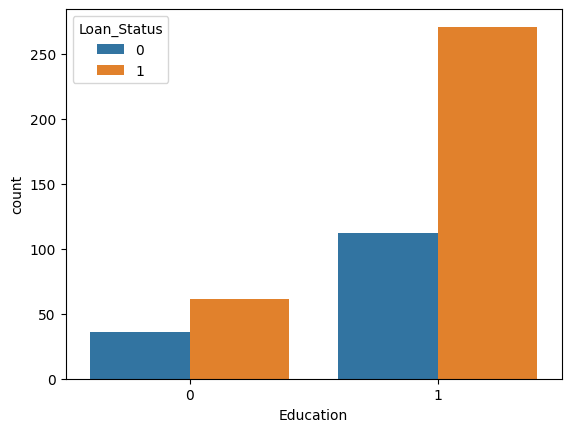

In [ ]:

sns.countplot(x='Education', hue='Loan_Status', data=loan_dataset)
plt.show()



Marital Status and Loan Status

<Axes: xlabel='Married', ylabel='count'>

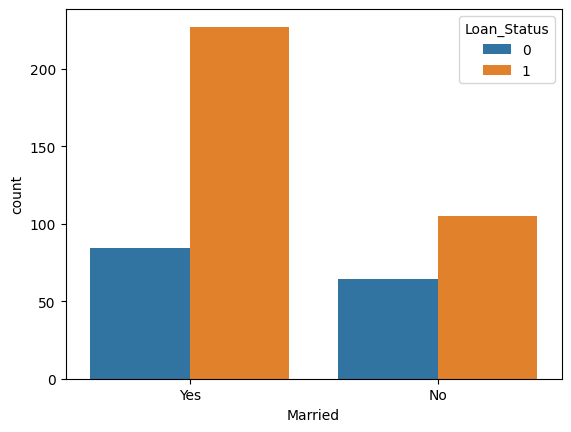

In [ ]:

sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)



Converting categorical columns to numerical values

In [ ]:

loan_dataset['Married'] = loan_dataset['Married'].map({'No': 0, 'Yes': 1})
loan_dataset['Gender'] = loan_dataset['Gender'].map({'Male': 1, 'Female': 0})
loan_dataset['Self_Employed'] = loan_dataset['Self_Employed'].map({'No': 0, 'Yes': 1})
loan_dataset['Property_Area'] = loan_dataset['Property_Area'].map({'Rural': 0, 'Semiurban': 1, 'Urban': 2})
loan_dataset['Education'] = loan_dataset['Education'].map({'Graduate': 1, 'Not Graduate': 0})



In [ ]:

loan_dataset.head()



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


## Seperating the data and label

In [ ]:

X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']



In [ ]:

print(X)



     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [ ]:

print(Y)



1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64


# Train Test Split

In [ ]:

X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

print(X.shape, X_train.shape, X_test.shape)



(480, 11) (432, 11) (48, 11)


# Training the model

## Support Vector Machine Model

In [ ]:

classifier = svm.SVC(kernel='linear')



## Training the support Vector Macine model

In [ ]:

classifier.fit(X_train,Y_train)



SVC(kernel='linear')

# Model Evaluation

Accuracy Score on training data

In [ ]:

X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)



In [ ]:

print('Accuracy on training data : ', training_data_accuray)



Accuracy on training data :  0.7986111111111112


Accuracy Score on testing data

In [ ]:

X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)



In [ ]:

print('Accuracy on test data : ', test_data_accuray)



Accuracy on test data :  0.8333333333333334


# Predictive System

In [ ]:

gender_map = {'Male': 1, 'Female': 0}
married_map = {'Yes': 1, 'No': 0}
education_map = {'Graduate': 1, 'Not Graduate': 0}
self_employed_map = {'Yes': 1, 'No': 0}
property_area_map = {'Rural': 0, 'Semiurban': 1, 'Urban': 2}

# User can directly paste any row from the dataset
user_input = "Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban"

values = user_input.split(',')

input_data = (
    gender_map[values[0].strip()],
    married_map[values[1].strip()],
    int(values[2].strip()),
    education_map[values[3].strip()],
    self_employed_map[values[4].strip()],
    float(values[5].strip()),
    float(values[6].strip()),
    float(values[7].strip()),
    float(values[8].strip()),
    int(values[9].strip()),
    property_area_map[values[10].strip()]
)


input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = classifier.predict(input_data_reshaped)

if prediction[0] == 1:
    print("Loan Approved")

else:
    print("Loan Not Approved")


Loan Approved


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
